In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

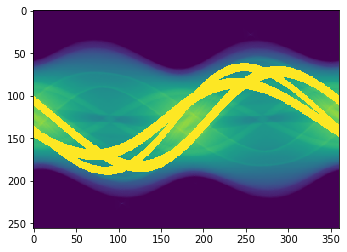

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img/10
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 30 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 25:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 5:
                        z = 0
                    else:
                        k = k+1
train_data = np.empty((k,window_size,window_size,1))
result_data = np.empty((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [11]:
k = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 30 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 25:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 5:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(12780, 3, 3, 1)
(12780, 1)
Epoch 1/1000
400/400 [==============================] - 0s 1ms/step - loss: 2.6494 - accuracy: 0.1649
Epoch 2/1000
400/400 [==============================] - 0s 1ms/step - loss: 1.5386 - accuracy: 0.3735
Epoch 3/1000
400/400 [==============================] - 0s 1ms/step - loss: 1.2056 - accuracy: 0.4855
Epoch 4/1000
400/400 [==============================] - 0s 1ms/step - loss: 1.0483 - accuracy: 0.5500
Epoch 5/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.9527 - accuracy: 0.5898
Epoch 6/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.8801 - accuracy: 0.6300
Epoch 7/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.8133 - accuracy: 0.6541
Epoch 8/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.7543 - accuracy: 0.6847
Epoch 9/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.7192
Epoch 10/1000
400/400 [==============================]

400/400 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7981
Epoch 81/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8145
Epoch 82/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.8147
Epoch 83/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8176
Epoch 84/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8188
Epoch 85/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.8065
Epoch 86/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8157
Epoch 87/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8193
Epoch 88/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8112
Epoch 89/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4404 - a

400/400 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8365
Epoch 160/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8304
Epoch 161/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8361
Epoch 162/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8305
Epoch 163/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8411
Epoch 164/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3935 - accuracy: 0.8336
Epoch 165/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3896 - accuracy: 0.8390
Epoch 166/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8465
Epoch 167/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8338
Epoch 168/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

400/400 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8549
Epoch 238/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8449
Epoch 239/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8486
Epoch 240/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8499
Epoch 241/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8517
Epoch 242/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8505
Epoch 243/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8517
Epoch 244/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8501
Epoch 245/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8462
Epoch 246/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

400/400 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8594
Epoch 316/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8594
Epoch 317/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8609
Epoch 318/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8628
Epoch 319/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8531
Epoch 320/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8606
Epoch 321/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8588
Epoch 322/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8629
Epoch 323/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8572
Epoch 324/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

400/400 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8741
Epoch 394/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8615
Epoch 395/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8641
Epoch 396/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8670
Epoch 397/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8642
Epoch 398/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.8665
Epoch 399/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8643
Epoch 400/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8691
Epoch 401/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.8680
Epoch 402/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

400/400 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8730
Epoch 472/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8727
Epoch 473/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3049 - accuracy: 0.8722
Epoch 474/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8624
Epoch 475/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8711
Epoch 476/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.8660
Epoch 477/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8754
Epoch 478/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8687
Epoch 479/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8712
Epoch 480/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

400/400 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8768
Epoch 550/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.8709
Epoch 551/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8718
Epoch 552/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8780
Epoch 553/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8723
Epoch 554/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8707
Epoch 555/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.2975 - accuracy: 0.8798
Epoch 556/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.8738
Epoch 557/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8727
Epoch 558/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

400/400 [==============================] - 1s 1ms/step - loss: 0.3044 - accuracy: 0.8748
Epoch 628/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.3017 - accuracy: 0.8749
Epoch 629/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2955 - accuracy: 0.8774
Epoch 630/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.3111 - accuracy: 0.8725
Epoch 631/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.3019 - accuracy: 0.8755
Epoch 632/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2891 - accuracy: 0.8804
Epoch 633/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8703
Epoch 634/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.3096 - accuracy: 0.8687
Epoch 635/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2978 - accuracy: 0.8771
Epoch 636/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

400/400 [==============================] - 1s 1ms/step - loss: 0.2862 - accuracy: 0.8807
Epoch 706/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.3021 - accuracy: 0.8732
Epoch 707/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2968 - accuracy: 0.8779
Epoch 708/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.8816
Epoch 709/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.8761
Epoch 710/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2945 - accuracy: 0.8772
Epoch 711/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2991 - accuracy: 0.8768
Epoch 712/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2924 - accuracy: 0.8760
Epoch 713/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2920 - accuracy: 0.8769
Epoch 714/1000
400/400 [==============================] - 1s 1ms/step - loss: 0

400/400 [==============================] - 1s 1ms/step - loss: 0.2987 - accuracy: 0.8765
Epoch 784/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2878 - accuracy: 0.8800
Epoch 785/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2948 - accuracy: 0.8775
Epoch 786/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2904 - accuracy: 0.8775
Epoch 787/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.3011 - accuracy: 0.8741
Epoch 788/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2869 - accuracy: 0.8834
Epoch 789/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2976 - accuracy: 0.8747
Epoch 790/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.3013 - accuracy: 0.8725
Epoch 791/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2930 - accuracy: 0.8767
Epoch 792/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

400/400 [==============================] - 1s 1ms/step - loss: 0.2875 - accuracy: 0.8793
Epoch 862/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2825 - accuracy: 0.8862
Epoch 863/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2801 - accuracy: 0.8828
Epoch 864/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2949 - accuracy: 0.8750
Epoch 865/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2788 - accuracy: 0.8842
Epoch 866/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2878 - accuracy: 0.8819
Epoch 867/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2974 - accuracy: 0.8746
Epoch 868/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2872 - accuracy: 0.8806
Epoch 869/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2907 - accuracy: 0.8775
Epoch 870/1000
400/400 [==============================] - 1s 1ms/step - loss: 0

400/400 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8826
Epoch 940/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.8864
Epoch 941/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8814
Epoch 942/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2856 - accuracy: 0.8824
Epoch 943/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2879 - accuracy: 0.8797
Epoch 944/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2781 - accuracy: 0.8847
Epoch 945/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2803 - accuracy: 0.8823
Epoch 946/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.2777 - accuracy: 0.8831
Epoch 947/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.8812
Epoch 948/1000
400/400 [==============================] - 0s 1ms/step - loss: 0

In [12]:
for i in range(256-window_size):
    for j in range(120-window_size):
        if 30 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 30:
                test_data = np.empty((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
                if (np.where(prediction[0]==max(prediction[0]))[0][0]) != (np.argmax(prediction)):
                    print("x")

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

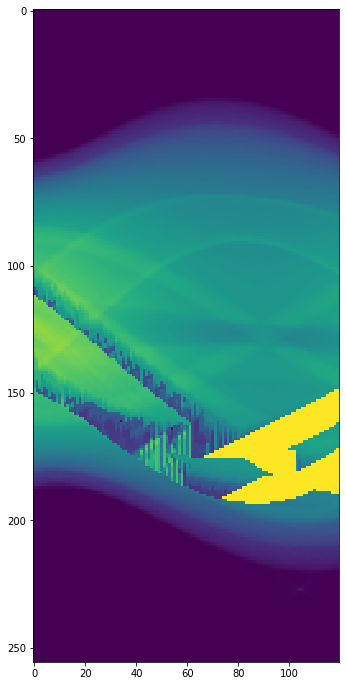

In [13]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:120])
plt.colorbar

In [ ]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)